<a href="https://colab.research.google.com/github/edilmita/edilmita/blob/main/capstonehistorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")
from time import time
from collections import Counter
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.metrics import *   
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  

import os
import sys
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Pretty display for notebooks
%matplotlib inline

In [ ]:
allmydata = pd.read_csv('/content/annual_generation_state.csv')
allmydata.head(5)

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8823445
1,2002,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8742928
2,2003,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8535065
3,2004,US-TOTAL,Total Electric Power Industry,Pumped Storage,-8488210
4,2001,US-TOTAL,"Electric Generators, Electric Utilities",Pumped Storage,-7704482


In [ ]:
allmydata.shape

(55886, 5)

The user selected the state for the projec.

In [ ]:
mydata = allmydata[allmydata['STATE'] == 'TX']
 
print(mydata)

       YEAR STATE                                  TYPE OF PRODUCER  \
812    2020    TX  Electric Generators, Independent Power Producers   
841    2019    TX  Electric Generators, Independent Power Producers   
852    2018    TX  Electric Generators, Independent Power Producers   
856    2017    TX  Electric Generators, Independent Power Producers   
939    2020    TX           Electric Generators, Electric Utilities   
...     ...   ...                                               ...   
55643  2017    TX                     Total Electric Power Industry   
55644  2016    TX                     Total Electric Power Industry   
55654  2020    TX                     Total Electric Power Industry   
55656  2018    TX                     Total Electric Power Industry   
55658  2019    TX                     Total Electric Power Industry   

      ENERGY SOURCE  GENERATION (Megawatthours)  
812           Other                      -23417  
841           Other                      -11091

In [ ]:
mydata.shape


(1366, 5)

Convert object data type into int64

In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 812 to 55658
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   YEAR                        1366 non-null   int64 
 1   STATE                       1366 non-null   object
 2   TYPE OF PRODUCER            1366 non-null   object
 3   ENERGY SOURCE               1366 non-null   object
 4   GENERATION (Megawatthours)  1366 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 64.0+ KB
None


Rename the columns names

In [ ]:
mydata.columns = ['YEAR','STATE','PRODUCER','ENERGY','GENERATION']
print(mydata.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 812 to 55658
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YEAR        1366 non-null   int64 
 1   STATE       1366 non-null   object
 2   PRODUCER    1366 non-null   object
 3   ENERGY      1366 non-null   object
 4   GENERATION  1366 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 64.0+ KB
None


Generates descriptive statistics

In [ ]:
mydata.describe()

,YEAR,GENERATION
count,1366.000000,1.366000e+03
mean,2005.812592,3.517159e+07
std,8.907174,7.652578e+07
min,1990.000000,-2.341700e+04
25%,1998.000000,1.212190e+05
50%,2006.000000,1.075562e+06
75%,2014.000000,3.809776e+07
max,2020.000000,4.832010e+08


Print Instances and Atributes in our dataset.

In [ ]:
mydata.shape

(1366, 5)

# Data Clean

Lost data can happen once no data is given for some items or for an entire component. Missing data is a extremely huge problem in a real-life situations.

In order to find missing values we used isna() function and sum to count the NaN values

In [ ]:
mydata.isna().sum() 

YEAR          0
STATE         0
PRODUCER      0
ENERGY        0
GENERATION    0
dtype: int64

In [ ]:
mydata['YEAR'].value_counts()

2020    51
2018    51
2017    51
2019    51
2014    49
2015    48
2016    48
2010    47
2012    46
2005    46
2006    45
2011    45
2004    45
2013    45
2002    45
2008    45
2003    44
2001    44
2007    44
2009    43
2000    43
1999    41
1997    41
1998    41
1996    40
1994    38
1993    38
1992    38
1991    38
1990    38
1995    37
Name: YEAR, dtype: int64

In [ ]:
mydata['STATE'].value_counts()

TX    1366
Name: STATE, dtype: int64

In [ ]:
mydata['PRODUCER'].value_counts()

Total Electric Power Industry                       358
Combined Heat and Power, Industrial Power           245
Electric Generators, Independent Power Producers    235
Electric Generators, Electric Utilities             229
Combined Heat and Power, Electric Power             152
Combined Heat and Power, Commercial Power           147
Name: PRODUCER, dtype: int64

In [ ]:
mydata = mydata.replace('Electric Generators, Electric Utilities',1)
mydata = mydata.replace('Combined Heat and Power, Industrial Power', 2)
mydata = mydata.replace('Electric Generators, Independent Power Producers',3)
mydata = mydata.replace('Combined Heat and Power, Commercial Power',4)
mydata = mydata.replace('Combined Heat and Power, Electric Power',5)
mydata = mydata.replace('Total Electric Power Industry',6)

mydata['PRODUCER'].value_counts()

6    358
2    245
3    235
1    229
5    152
4    147
Name: PRODUCER, dtype: int64

In [ ]:
mydata['ENERGY'].value_counts()

Total                             186
Natural Gas                       179
Petroleum                         166
Other Biomass                     139
Other                             119
Coal                              106
Other Gases                        98
Hydroelectric Conventional         92
Wind                               80
Wood and Wood Derived Fuels        78
Nuclear                            64
Solar Thermal and Photovoltaic     59
Name: ENERGY, dtype: int64

### Replace numerical value with string
### Replace all values from the Energy column that equal a specific variable

In [ ]:
mydata = mydata.replace('Natural Gas',1)
mydata = mydata.replace('Petroleum', 2)
mydata = mydata.replace('Coal',3)
mydata = mydata.replace('Other Biomass',4)
mydata = mydata.replace('Hydroelectric Conventional',5)
mydata = mydata.replace('Wood and Wood Derived Fuels',6)
mydata = mydata.replace('Other', 7)
mydata = mydata.replace('Wind',8)
mydata = mydata.replace('Other Gases', 9)
mydata = mydata.replace('Nuclear', 10)
mydata = mydata.replace('Solar Thermal and Photovoltaic', 11)
mydata = mydata.replace('Pumped Storage', 12)
mydata = mydata.replace('Geothermal', 13)
mydata = mydata.replace('Total',0)

mydata['ENERGY'].value_counts()


0     186
1     179
2     166
4     139
7     119
3     106
9      98
5      92
8      80
6      78
10     64
11     59
Name: ENERGY, dtype: int64

In [ ]:
mydata = mydata.replace("AL",1)
mydata = mydata.replace("AK",2)
mydata = mydata.replace("AZ",3)
mydata = mydata.replace("AR",4)
mydata = mydata.replace("CA",5)
mydata = mydata.replace("CO",6)
mydata = mydata.replace("CT",7)
mydata = mydata.replace("DE",8)
mydata = mydata.replace("FL",9)
mydata = mydata.replace("GA",10)
mydata = mydata.replace("HI",11)
mydata = mydata.replace("ID",12)
mydata = mydata.replace("IL",13)
mydata = mydata.replace("IN",14)
mydata = mydata.replace("IA",15)
mydata = mydata.replace("KS",16)
mydata = mydata.replace("KY",17)
mydata = mydata.replace("LA",18)
mydata = mydata.replace("ME",19)
mydata = mydata.replace("MD",20)
mydata = mydata.replace("MA",21)
mydata = mydata.replace("MI",22)
mydata = mydata.replace("MN",23)
mydata = mydata.replace("MS",24)
mydata = mydata.replace("MO",25)
mydata = mydata.replace("MT",26)
mydata = mydata.replace("NE",27)
mydata = mydata.replace("NV",28)
mydata = mydata.replace("NH",29)
mydata = mydata.replace("NJ",30)
mydata = mydata.replace("NM",31)
mydata = mydata.replace("NY",32)
mydata = mydata.replace("NC",33)
mydata = mydata.replace("ND",34)
mydata = mydata.replace("OH",35)
mydata = mydata.replace("OK",36)
mydata = mydata.replace("OR",37)
mydata = mydata.replace("PA",38)
mydata = mydata.replace("RI",39)
mydata = mydata.replace("SC",40)
mydata = mydata.replace("SD",41)
mydata = mydata.replace("TN",42)
mydata = mydata.replace("TX",43)
mydata = mydata.replace("UT",44)
mydata = mydata.replace("VT",45)
mydata = mydata.replace("VA",46)
mydata = mydata.replace("WA",47)
mydata = mydata.replace("WV",48)
mydata = mydata.replace("WI",49)
mydata = mydata.replace("WY",50)

mydata['STATE'].value_counts()


43    1366
Name: STATE, dtype: int64

Drop a row or observation by condition in this case "total" - 0

In [ ]:
print(mydata)

       YEAR  STATE  PRODUCER  ENERGY  GENERATION
812    2020     43         3       7      -23417
841    2019     43         3       7      -11091
852    2018     43         3       7       -6898
856    2017     43         3       7       -4940
939    2020     43         1       7        -982
...     ...    ...       ...     ...         ...
55643  2017     43         6       0   452794365
55644  2016     43         6       0   454047591
55654  2020     43         6       0   473514930
55656  2018     43         6       0   477352425
55658  2019     43         6       0   483201031

[1366 rows x 5 columns]


In [ ]:
print(mydata.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 812 to 55658
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   YEAR        1366 non-null   int64
 1   STATE       1366 non-null   int64
 2   PRODUCER    1366 non-null   int64
 3   ENERGY      1366 non-null   int64
 4   GENERATION  1366 non-null   int64
dtypes: int64(5)
memory usage: 64.0 KB
None


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

Function to calculate IOR for each numerical attribute and show skewness

In [ ]:
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return 

Data Visualization and Analysis
KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 43.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 43.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 43.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 43.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas

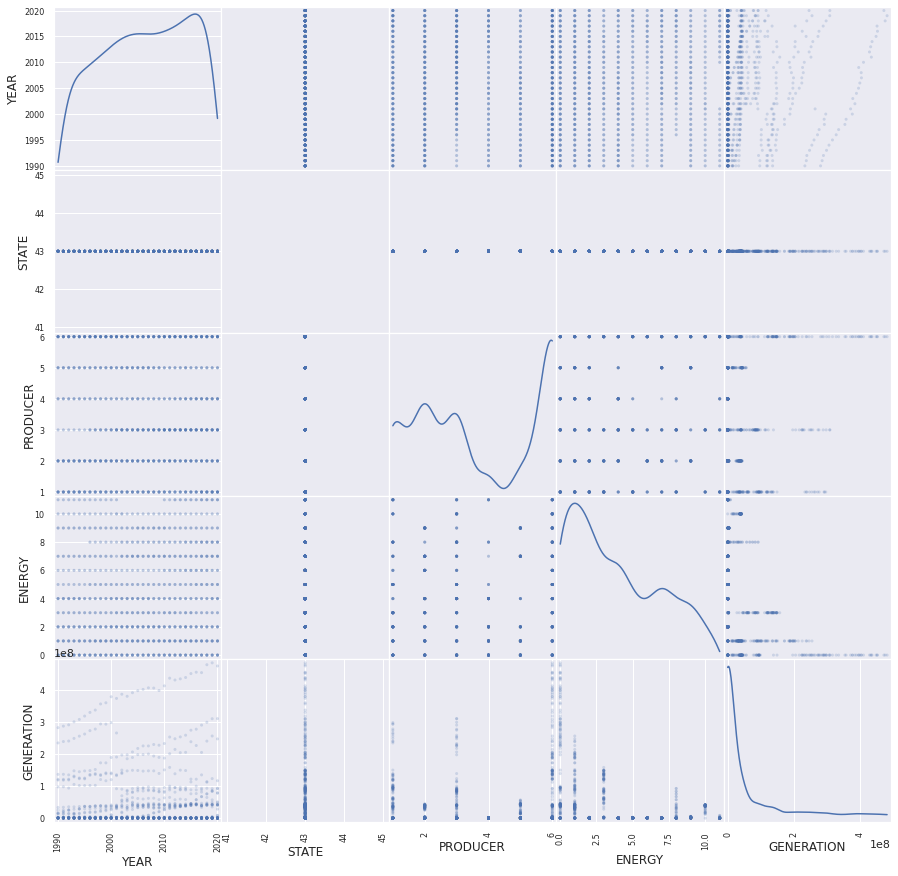

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(mydata, alpha=0.2, figsize=(15,15), diagonal= 'kde' )
plt.show()


Relations between the numerical columns

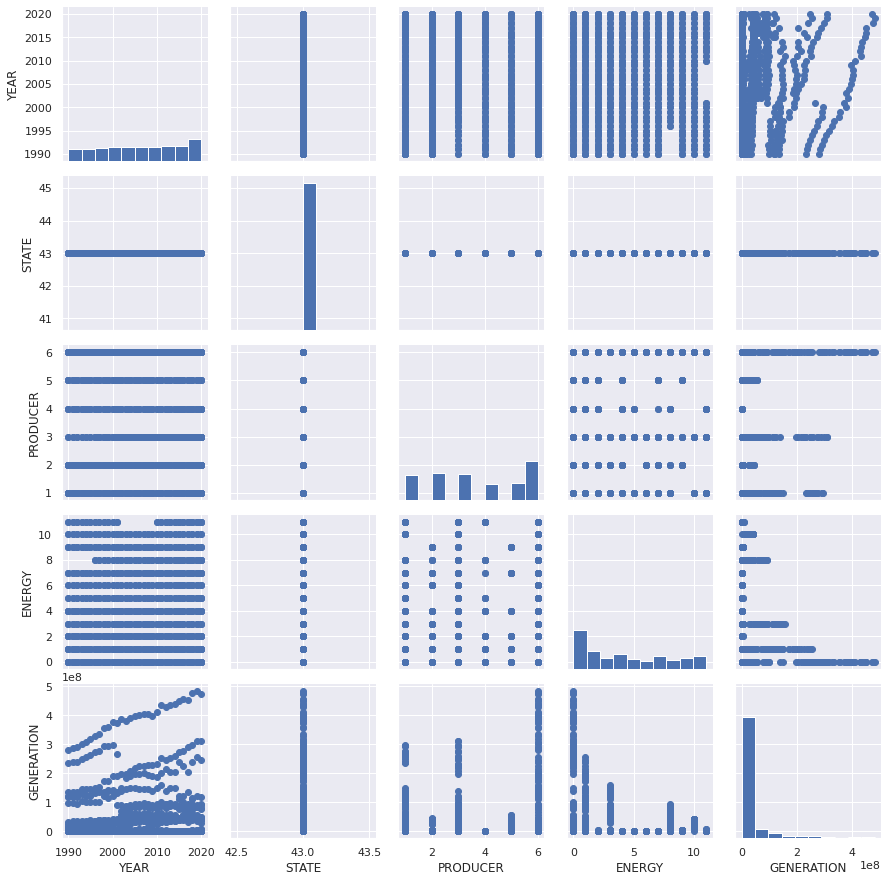

In [ ]:
g = sb.PairGrid(data = mydata)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c9e17610>,
      dtype=object)

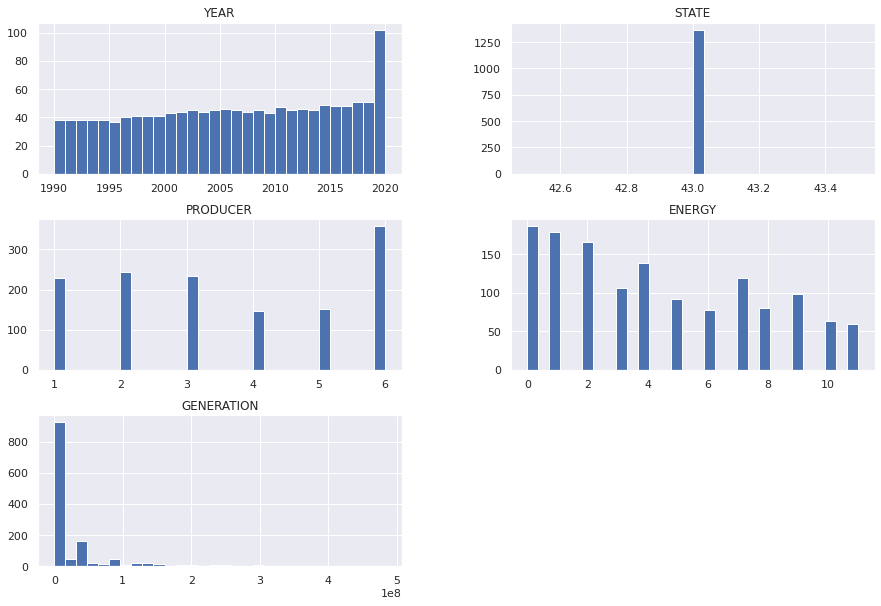

In [ ]:
mydata.hist(bins=30, figsize=(15, 10))

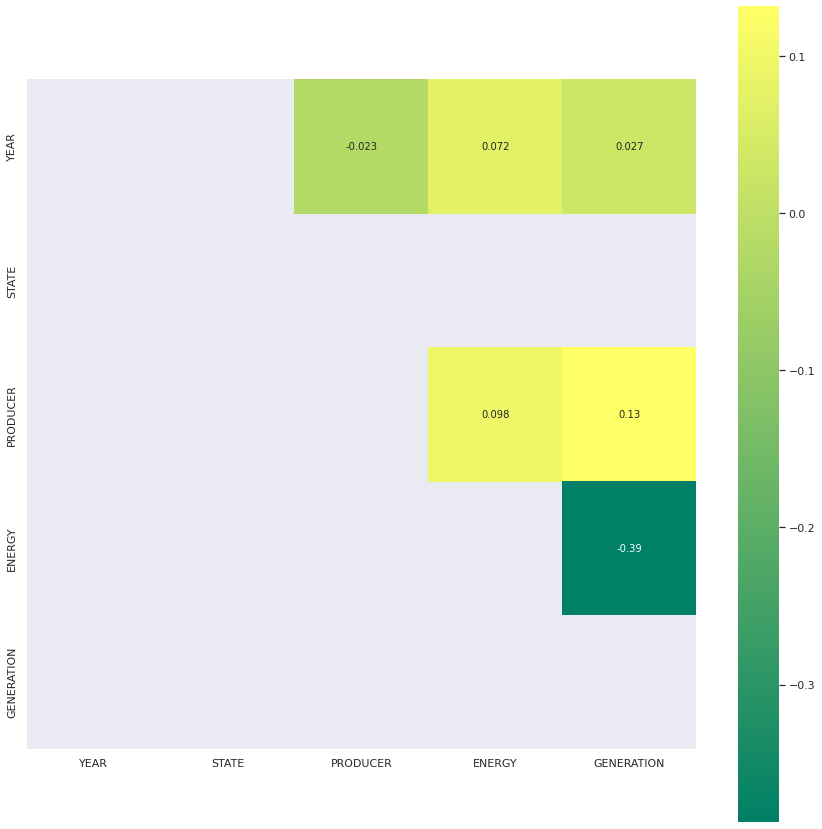

In [ ]:
plt.subplots(figsize=(15,15))
matrix = np.tril(mydata.corr())
sns.heatmap(mydata.corr(), annot = True, cmap= 'summer',square=True,mask = matrix)

Function definitions
Function for checking for outliers in the numeric value columns

In [ ]:
def outlier(var):
    high = np.mean(var) + 2*np.std(var)
    low = np.mean(var) - 2*np.std(var)
    outliers = (var >= high) | (var <= low)
    return outliers


Function to bin numerical columns

In [ ]:
def bins(x, n): 
    BinWidth = (max(x) - min(x))/n
    bound1 = float('-inf')
    bound2 = min(x) + 1 * BinWidth
    bound3 = min(x) + 2 * BinWidth
    bound4 = float('inf')
    Binned = np.array([" "]*len(x)) 
    Binned[(bound1 < x) & (x <= bound2)] = 1 # Low
    Binned[(bound2 < x) & (x <= bound3)] = 2 # Med
    Binned[(bound3 < x) & (x  < bound4)] = 3 # High
    return Binned

Function for z-standardization of a numerical column

In [ ]:
def norm(col): 
    x = np.array(col).astype(float)
    X = pd.DataFrame(x) 
    y = StandardScaler().fit(X).transform(X)
    return y

Remove/replace outliers for the numerical columns.
Replace outliers with median values for the numerical column, 'GENERATION'.

In [ ]:
outliers = outlier(mydata['GENERATION'])
mydata.loc[outliers, 'GENERATION'] = np.median(mydata.loc[:,"GENERATION"])

print(mydata)

       YEAR  STATE  PRODUCER  ENERGY  GENERATION
812    2020     43         3       7    -23417.0
841    2019     43         3       7    -11091.0
852    2018     43         3       7     -6898.0
856    2017     43         3       7     -4940.0
939    2020     43         1       7      -982.0
...     ...    ...       ...     ...         ...
55643  2017     43         6       0   1075561.5
55644  2016     43         6       0   1075561.5
55654  2020     43         6       0   1075561.5
55656  2018     43         6       0   1075561.5
55658  2019     43         6       0   1075561.5

[1366 rows x 5 columns]


# Data Visualization and Analysis

Text(0, 0.5, 'count')

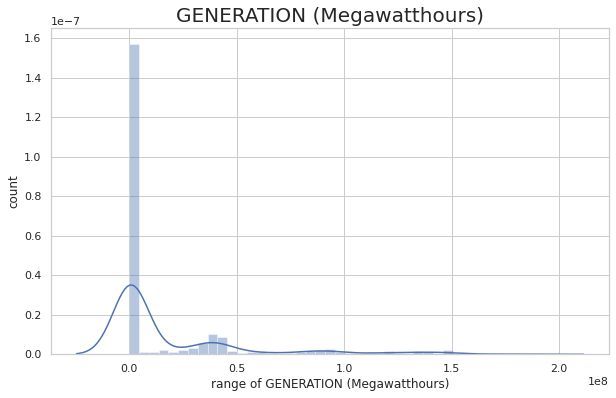

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['GENERATION'])
plt.title('GENERATION (Megawatthours)', fontsize = 20)
plt.xlabel('range of GENERATION (Megawatthours)')
plt.ylabel('count')

Text(0, 0.5, 'count')

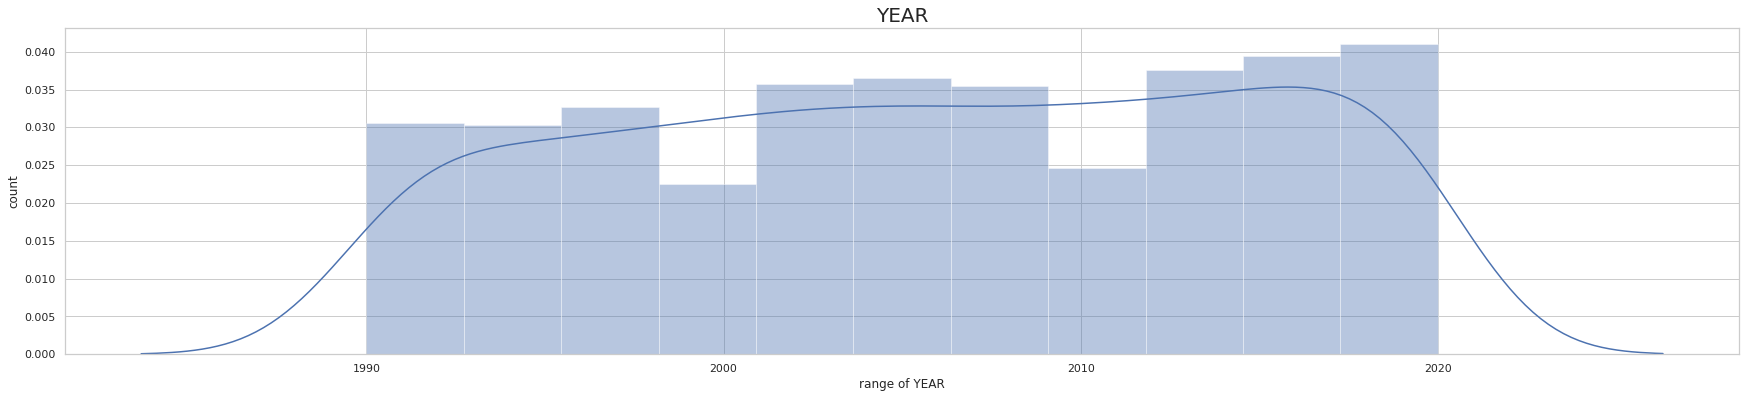

In [ ]:
plt.figure(figsize=(30, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['YEAR'])
plt.title('YEAR', fontsize = 20)
plt.xlabel('range of YEAR')
plt.ylabel('count')

Text(6.5, 0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")

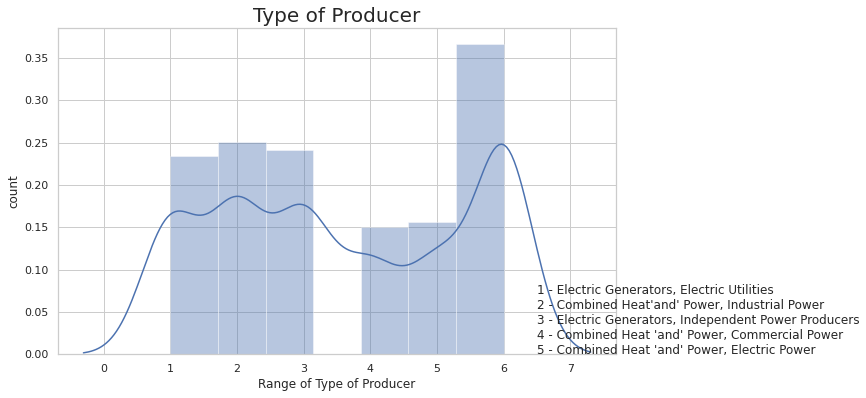

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['PRODUCER'])
plt.title('Type of Producer', fontsize = 20)
plt.xlabel('Range of Type of Producer')
plt.ylabel('count')
plt.text(6.5,0, "1 - Electric Generators, Electric Utilities \n2 - Combined Heat'and' Power, Industrial Power \n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power")


Text(16, 0, '1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal')

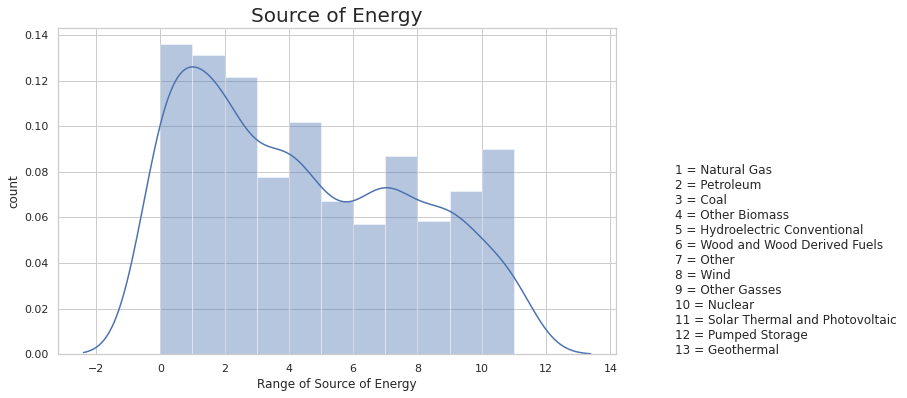

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(mydata['ENERGY'])
plt.title('Source of Energy', fontsize = 20)
plt.xlabel('Range of Source of Energy')
plt.ylabel('count')
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")


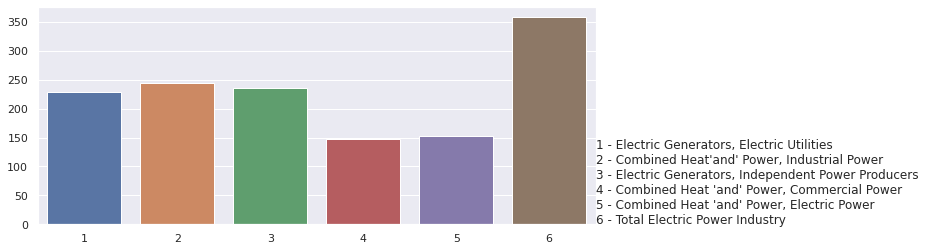

In [ ]:
PRODUCER = mydata.PRODUCER.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=PRODUCER.index, y=PRODUCER.values)
plt.text(5.5,1, "1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()

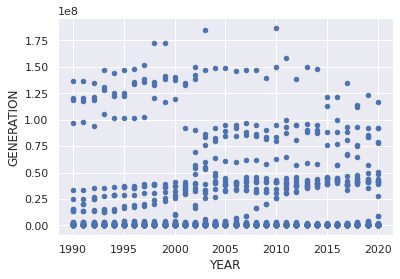

In [ ]:
mydata.plot(x = 'YEAR', y = 'GENERATION', kind='scatter')

In [ ]:
mydata.corr()

,YEAR,STATE,PRODUCER,ENERGY,GENERATION
YEAR,1.000000,NaN,-0.022518,0.072049,0.003954
STATE,NaN,NaN,NaN,NaN,NaN
PRODUCER,-0.022518,NaN,1.000000,0.098214,-0.022371
ENERGY,0.072049,NaN,0.098214,1.000000,-0.235529
GENERATION,0.003954,NaN,-0.022371,-0.235529,1.000000


In [ ]:
print(mydata)

       YEAR  STATE  PRODUCER  ENERGY  GENERATION
812    2020     43         3       7    -23417.0
841    2019     43         3       7    -11091.0
852    2018     43         3       7     -6898.0
856    2017     43         3       7     -4940.0
939    2020     43         1       7      -982.0
...     ...    ...       ...     ...         ...
55643  2017     43         6       0   1075561.5
55644  2016     43         6       0   1075561.5
55654  2020     43         6       0   1075561.5
55656  2018     43         6       0   1075561.5
55658  2019     43         6       0   1075561.5

[1366 rows x 5 columns]


Normalize values for the numerical columns by z-standardization

Normalize the GENERATION column; plot the normalized GENERATION data.

In [ ]:
col = mydata["GENERATION"]
mydata["GENERATION"] = norm(col)
print(mydata)

       YEAR  STATE  PRODUCER  ENERGY  GENERATION
812    2020     43         3       7   -0.516636
841    2019     43         3       7   -0.516281
852    2018     43         3       7   -0.516160
856    2017     43         3       7   -0.516104
939    2020     43         1       7   -0.515990
...     ...    ...       ...     ...         ...
55643  2017     43         6       0   -0.484950
55644  2016     43         6       0   -0.484950
55654  2020     43         6       0   -0.484950
55656  2018     43         6       0   -0.484950
55658  2019     43         6       0   -0.484950

[1366 rows x 5 columns]


Spiliting Dataset into training(75%) and test set(25%)

In [ ]:
X = mydata.iloc[:,:-1].values
y = mydata.iloc[:,-1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)

X_train.shape

(1092, 4)

#Principal Component Analysis
We can use principal component analysis to see if we can have a good representation of our dataset in two or three dimensions.

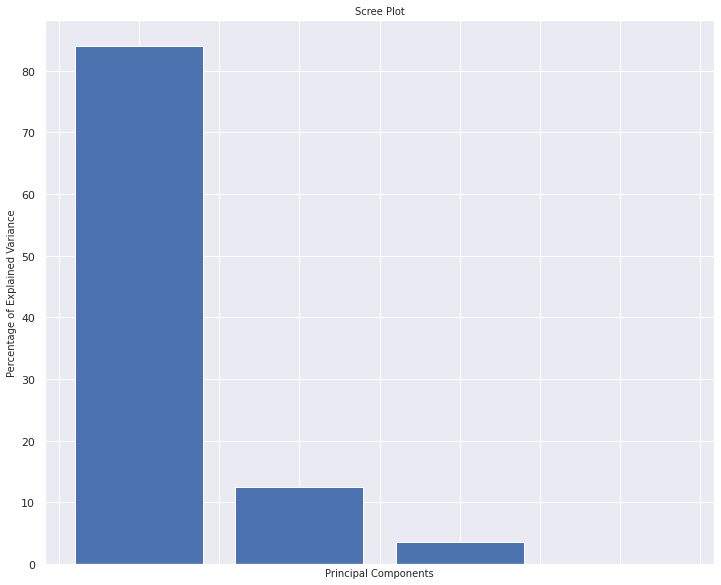

In [ ]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = [str(x) for x in range(1,len(per_var)+1)]
plt.rcParams['figure.figsize'] = (12, 10)
font=10
plt.bar(x=range(1,len(per_var)+1),height=per_var)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Percentage of Explained Variance', fontsize = font)
plt.xlabel('Principal Components', fontsize = font)
plt.title('Scree Plot', fontsize = font)
plt.show()

Text(0.5, 1.0, 'Years')

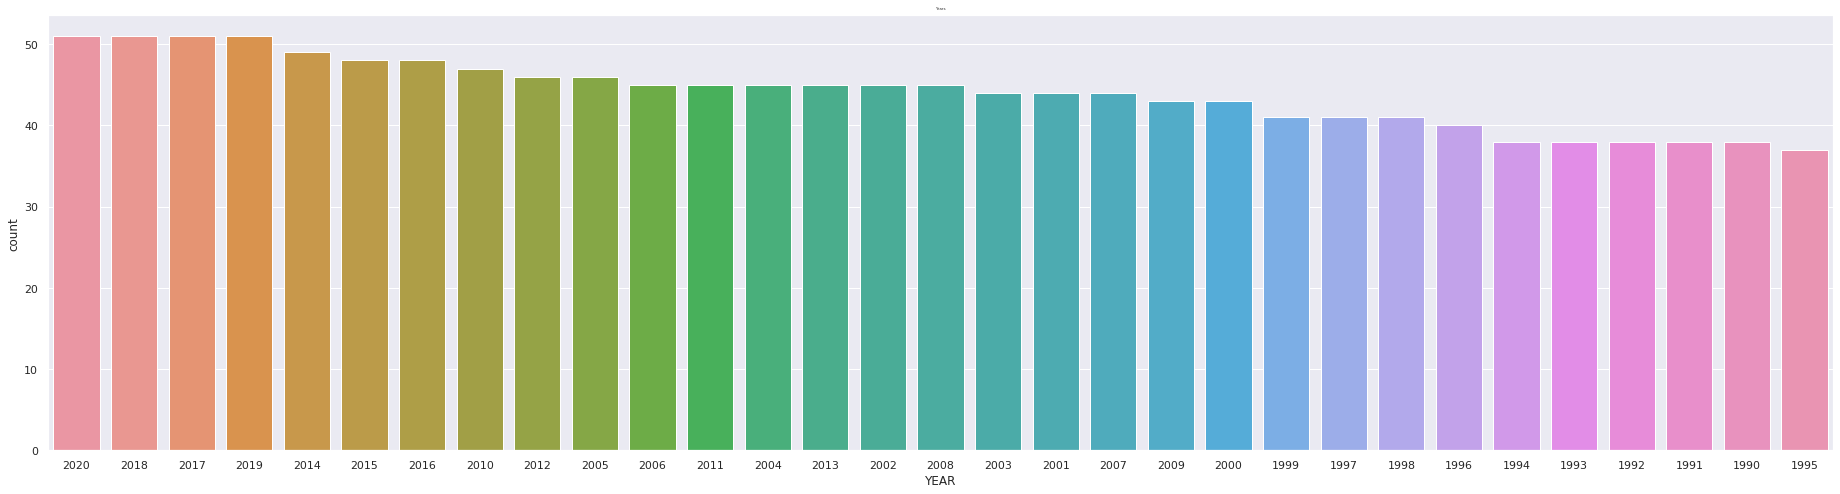

In [ ]:
plt.figure(figsize=(32, 8))
sns.countplot(mydata.YEAR.dropna(), order = mydata.YEAR.value_counts().index);
plt.title('Years', fontsize = 4)

Because the percentage of explained variance decay slowly, it is not possible to represent well our dataset in two or three dimensions.
2D PCA Plot
We can have a look at our dataset in a 2D Plot.

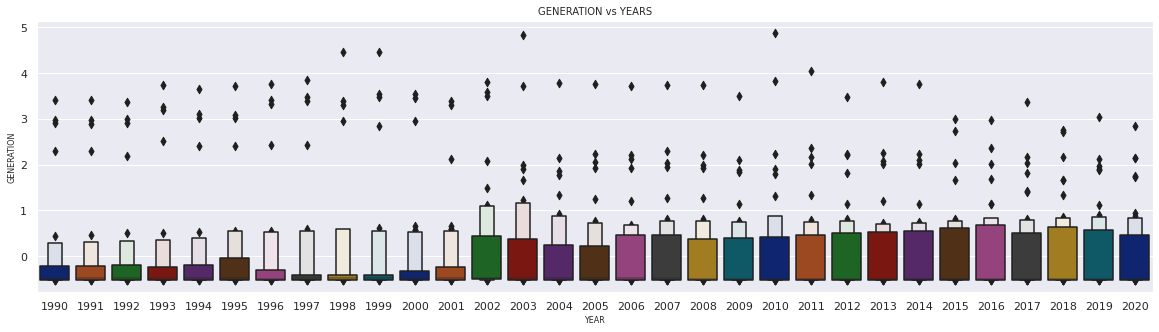

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
# exit Generation vrs Years
sns.boxenplot(mydata['YEAR'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs YEARS', fontsize = 10)
plt.xlabel('YEAR', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)

plt.show()

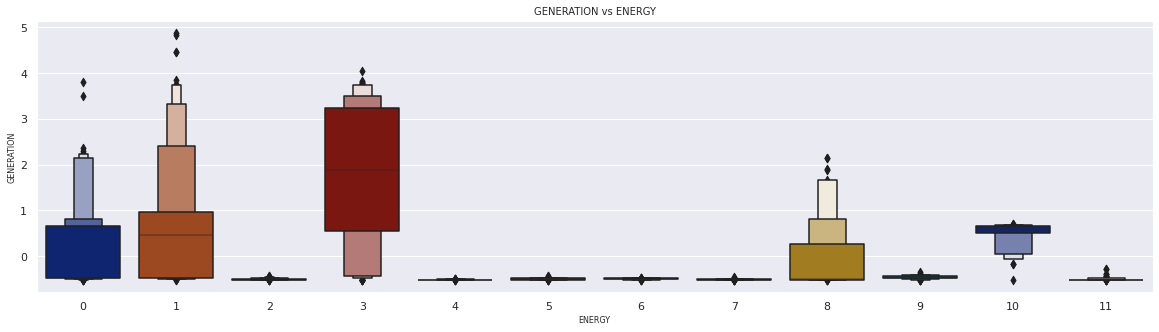

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel('ENERGY', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)

plt.show()

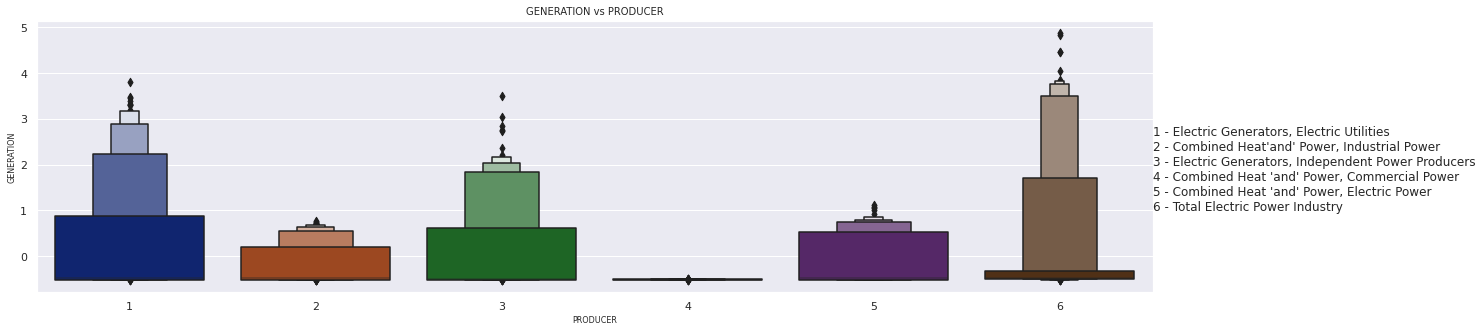

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
# exit Generation vrs Producer
sns.boxenplot(mydata['PRODUCER'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs PRODUCER', fontsize = 10)
plt.xlabel('PRODUCER', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(5.5,1, "1 - Electric Generators, Electric Utilities\n2 - Combined Heat'and' Power, Industrial Power\n3 - Electric Generators, Independent Power Producers\n4 - Combined Heat 'and' Power, Commercial Power\n5 - Combined Heat 'and' Power, Electric Power\n6 - Total Electric Power Industry")
plt.show()

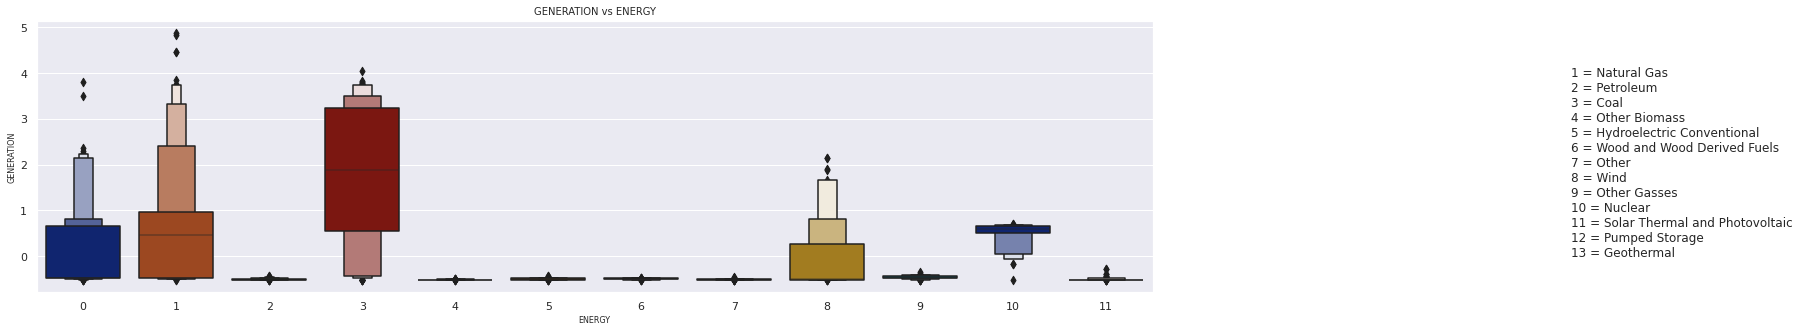

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
# exit Generation vrs Energy
sns.boxenplot(mydata['ENERGY'], mydata['GENERATION'], palette = 'dark')
plt.title('GENERATION vs ENERGY', fontsize = 10)
plt.xlabel('ENERGY', fontsize = 8)
plt.ylabel('GENERATION', fontsize = 8)
plt.text(16,0, "1 = Natural Gas \n2 = Petroleum \n3 = Coal \n4 = Other Biomass \n5 = Hydroelectric Conventional \n6 = Wood and Wood Derived Fuels \n7 = Other\n8 = Wind \n9 = Other Gasses \n10 = Nuclear \n11 = Solar Thermal and Photovoltaic \n12 = Pumped Storage  \n13 = Geothermal")
plt.show()

The violin plot is showing us the same pattern for each visitor type. Page Value for most of the entries are close to 0 when the Revenue is False. But the values are spread out when Revenue is True. This may come from the definition of the PageValue, which gives a value close to 0 to pages which did not generate a lot of revenue.

##Building ML Model
#Overview of a few model's performance

Let's compare a few algorithms that can be used for classification to see the performance of each ones.

ValueError: ignored

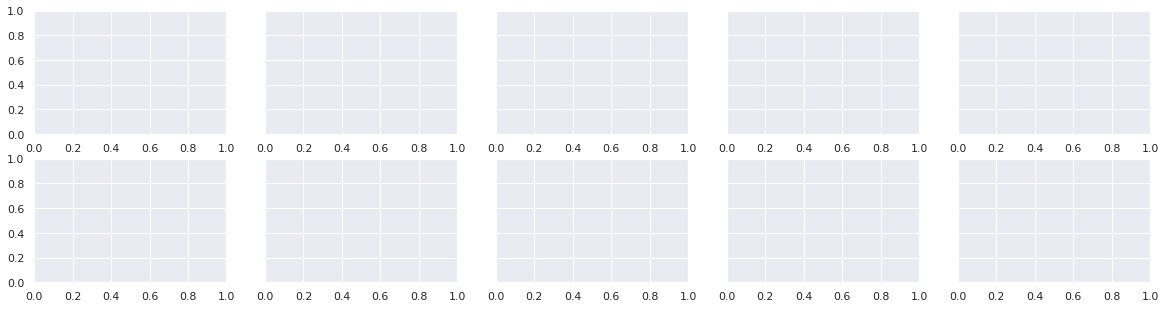

In [ ]:
classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbour": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree Classification": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classification ": GradientBoostingClassifier(),
    "Random Forest Classification": RandomForestClassifier()
    }

f, axes = plt.subplots(2, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    j = 0
    k = i
    if i>4:
        k = i-5
        j+=1
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    #y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print(key, "\n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Purchased","Purchased"])
    disp.plot(ax=axes[j][k], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)
plt.show()

Applying Machine Learning Algorithm for Classification Problem
Logistic Regression
In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [ ]:
#from sklearn.linear_model import LogisticRegression
#logmodel = LogisticRegression(random_state=1)
#logmodel.fit(X_train,y_train)
